In [8]:
import pandas as pd
import numpy as np

from numpy import average


#import the csv to pandas
file_path='/home/itay/salarySurvey/data/form_result.csv'
df =pd.read_csv(file_path)



In [9]:
# enter the coulmns names as varibels:

salary='שכר שעתי במשרת הסטודנט הראשונה (ש"ח לשעה)'
grade='ממוצע (נכון לתקופת חיפוש העבודה)'
bargin='האם התמקחת אחרי קבלת ההצעה?'
gender='מין'
company='חברה (נא לכתוב באנגלית את שם החברה)'



In [10]:
#cleanup to the data, you should add your own cleanup to the data:
df=df.drop(65)
df=df.drop(82)
df=df.drop(104)
df=df.drop(117)

df[df[salary].str.contains("50K",na=False)]
df=df.drop(102)

df[df[salary]=='20']
df=df.drop(148)

df[df[grade].str.contains(" תואר ראשון",na=False)]
df=df.drop(115)



In [11]:
av_df=df[salary].astype(float).sum()/len(df)
av_df

96.12264150943396

In [31]:
#calculate the average value of columnName column in df:
def calculate_average(df,column_name):
    num_of_rows=len(df)
    sum_of_rows=df[column_name].astype(float).sum()
    return sum_of_rows/num_of_rows # return the average value

def calculate_precentage_of_binary_answer(df,column_name,binary_field_answer):
    return len(df[df[column_name]==binary_field_answer])/ len(df)

In [37]:
#calculate average salary and grades:

male_df= df.loc[df[gender]=='זכר']
female_df= df.loc[df['מין']=='נקבה']

average_salary_male = calculate_average(male_df,salary)
average_grade_male = calculate_average(male_df,grade)

average_salary_female = calculate_average(female_df,salary)
average_grade_female = calculate_average(female_df,grade)


In [38]:
#bargin presentage:

precents_of_male_bargin=calculate_precentage_of_binary_answer(male_df,bargin,'כן')
precents_of_female_bargin=calculate_precentage_of_binary_answer(female_df,bargin,'כן')


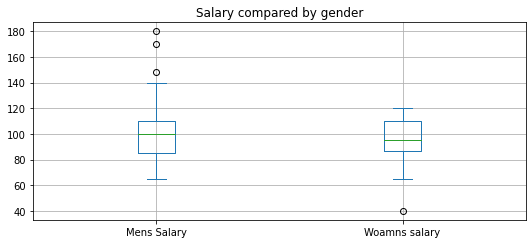

In [41]:
import matplotlib.pyplot as plt
man_salarys=male_df[[salary]].astype(float)
fman_salarys=female_df[[salary]].astype(float)

# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Pandas dataframe
combined_dfs = pd.DataFrame({"Mens Salary": male_df[salary].astype(float), "Woamns salary": female_df[salary].astype(float)})

# Plot the dataframe
ax = combined_dfs[['Mens Salary', 'Woamns salary']].plot(kind='box',grid=True,title='Salary compared by gender')

# Display the plot
plt.show()

In [49]:
#scatter plot preperation:
#Remove outliers for more comftarble scatterPoint graph:

scatter_df=df
scatter_df[scatter_df[salary]=='180']
scatter_df=scatter_df.drop(146)

In [51]:
from scipy.stats import gaussian_kde


x=scatter_df[grade].astype(float)
y=scatter_df[salary].astype(float)

xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)


plt.scatter(x,y)
plt.title("Average grade - Salary plot")
plt.xlabel("Average grade")
plt.ylabel("Salary")
plt.show()

ValueError: array must not contain infs or NaNs

In [19]:
df_intel = df[df[company]=='Intel']
df_microsoft = df[df[company]=='Microsoft']
df_Amazon = df[df[company]=='Amazon']
df_Google = df[df[company]=='Google']
df_Facebook = df[df[company]=='Facebook']
df_Apple = df[df[company]=='Apple']
df_IBM = df[df[company]=='IBM']
df_Rafael = df[df[company]=='Rafael']
df_Elbit = df[df[company]=='Elbit']
df_Plus500 = df[df[company]=='Plus500']
df_Nvidia = df[df[company]=='Nvidia']
df_Mobileye = df[df[company]=='Mobileye']

av_intel=df_intel[salary].astype(float).sum() / len(df_intel)
av_mic=df_microsoft[salary].astype(float).sum() / len(df_microsoft)
av_ama=df_Amazon[salary].astype(float).sum() / len(df_Amazon)
av_google=df_Google[salary].astype(float).sum() / len(df_Google)
av_facebook=df_Facebook[salary].astype(float).sum() / len(df_Facebook)
av_apple=df_Apple[salary].astype(float).sum() / len(df_Apple)
av_ibm=df_IBM[salary].astype(float).sum() / len(df_IBM)
av_rafael=df_Rafael[salary].astype(float).sum() / len(df_Rafael)
av_elbit=df_Elbit[salary].astype(float).sum() / len(df_Elbit)
av_plus500=df_Plus500[salary].astype(float).sum() / len(df_Plus500)
av_ncidia=df_Nvidia[salary].astype(float).sum() / len(df_Nvidia)
av_mobileye=df_Mobileye[salary].astype(float).sum() / len(df_Mobileye)

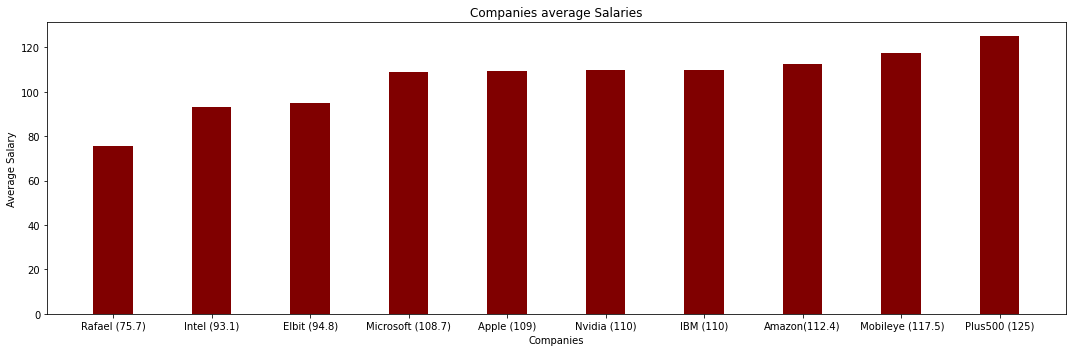

In [20]:
companys=['Rafael (75.7)','Intel (93.1)','Elbit (94.8)','Microsoft (108.7)','Apple (109)','Nvidia (110)','IBM (110)','Amazon(112.4)',' Mobileye (117.5)','Plus500 (125)']
salarys=[av_rafael,av_intel,av_elbit,av_mic,av_apple,av_ncidia,av_ibm,av_ama,av_mobileye,av_plus500]
fig=plt.figure(figsize=(15,5))
plt.bar(companys, salarys, color ='maroon',
        width = 0.4)
 
plt.xlabel("Companies")
plt.ylabel("Average Salary")
plt.title("Companies average Salaries")
plt.show()


In [21]:
av_ncidia

110.0

In [22]:
df

,Timestamp,מסלול לימודים,באיזה סמסטר היית כשקיבלת את ההצעה?,ממוצע (נכון לתקופת חיפוש העבודה),האם ביקשו גיליון ציונים?,קורסי מפתח שעשית לפני הצעת העבודה,האם היה לך ניסיון לפני קבלת המשרה?,"שכר שעתי במשרת הסטודנט הראשונה (ש""ח לשעה)",האם התמקחת אחרי קבלת ההצעה?,חברה (נא לכתוב באנגלית את שם החברה),תחום המשרה,מין,טעם גלידה אהוב
0,16/08/2022 12:35:22,הנדסת מחשבים,5.0,88,כן,"מת""מ",ללא ניסיון כלל,100,לא,Intel,Embedded,זכר,בייגלה מלוח - קרמל
1,16/08/2022 12:36:57,"מדמ""ח",4.0,80,כן,"מת""מ, מבני נתונים",ללא ניסיון כלל,85,לא,Philips,Software Development,נקבה,פיסטוק
2,16/08/2022 12:37:34,"מדמ""ח",4.0,86,כן,"מת""מ, מבני נתונים, הפעלה",ללא ניסיון כלל,110,לא,Apple,Embedded,נקבה,פיסטוק
3,16/08/2022 12:39:02,"מדמ""ח",3.0,85,כן,"מת""מ",ללא ניסיון כלל,93,לא,Intel,Backend,זכר,שוקולד בראוניס
4,16/08/2022 12:41:55,הנדסת מחשבים,6.0,75,לא,"מת""מ, מבני נתונים, הפעלה, אלגו, קורס בחירה הקש...",ללא ניסיון כלל,70,לא,NaN,Backend,NaN,פיסטוק
...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,17/08/2022 09:59:56,"מדמ""ח",5.0,84,כן,"מת""מ, מבני נתונים",ללא ניסיון כלל,105,NaN,Nvidia,Validation/Testing,נקבה,וניל עוגיות
162,17/08/2022 10:12:19,"מדמ""ח",3.0,94,כן,"מת""מ, מבני נתונים",ללא ניסיון כלל,170,לא,Facebook,Full Stack,זכר,בצק עוגיות
163,17/08/2022 12:27:11,"מדמ""ח",3.0,84,כן,"מת""מ",פרויקטים אישיים משמעותיים,73,לא,Intel,Software Development,זכר,NaN
164,17/08/2022 12:39:58,"מדמ""ח",3.0,76,לא,"מת""מ",פרויקטים אישיים משמעותיים,75,לא,NaN,Backend,זכר,שוקולד בראוניס


In [23]:
ice='טעם גלידה אהוב'
df_caramel=df[df[ice]=='בייגלה מלוח - קרמל']
df_pishtok=df[df[ice]=='פיסטוק']
df_vanilcokie=df[df[ice]=='וניל עוגיות']
df_cookie_dough=df[df[ice]=='בצק עוגיות']
df_brownies=df[df[ice]=='שוקולד בראוניס']

In [24]:
avrg_salary={}
avrg_salary['Vanilla cookie (90.65) '] = df_vanilcokie[salary].astype(float).sum()/len(df_vanilcokie)
avrg_salary['Salted Caramel (95.88) '] = df_caramel[salary].astype(float).sum()/len(df_caramel)
avrg_salary['cookie dough (98.94) '] = df_cookie_dough[salary].astype(float).sum()/len(df_cookie_dough)
avrg_salary['Pistachio (100.92) '] = df_pishtok[salary].astype(float).sum()/len(df_pishtok)
avrg_salary['Brownies (103.91) '] = df_brownies[salary].astype(float).sum()/len(df_brownies)


In [25]:
print(avrg_salary)

{'Vanilla cookie (90.65) ': 90.65217391304348, 'Salted Caramel (95.88) ': 95.88571428571429, 'cookie dough (98.94) ': 98.94, 'Pistachio (100.92) ': 100.92857142857143, 'Brownies (103.91) ': 103.91666666666667}


In [26]:
avrg_salary['Pistachio']

KeyError: 'Pistachio'

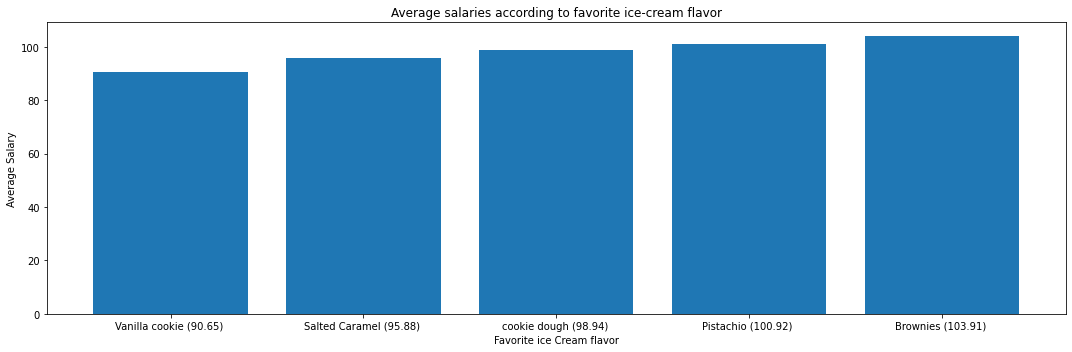

In [27]:
data = avrg_salary
names = list(data.keys())
values = list(data.values())
fig=plt.figure(figsize=(15,5))



plt.xlabel("Favorite ice Cream flavor")
plt.ylabel("Average Salary")
plt.title("Average salaries according to favorite ice-cream flavor")
plt.bar(range(len(data)), values, tick_label=names)
plt.show()